# Caminata aleatoria
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg" width="400px"/>

Una caminata aleatoria (*random walk* en inglés) es una formalización matemática de la trayectoria que resulta al hacer pasos sucesivos aleatorios. Un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y en cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Otros ejemplos:
- Trayectoria de una molécula al viajar en un fluido (líquido o gas).
- El camino que sigue un animal en su búsqueda de comida.
- El precio fluctuante de una acción.
- La situación de un apostador en un juego de azar.

Todos pueden ser aproximados por caminatas aleatorias, aunque no sean en verdad procesos aleatorios.

**Este también es un ejemplo de caminata aleatoria**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y77WnkLbT2Q')

### Caminata aleatoria en una dimensión
Como dijimos, un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y a cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Esta caminata se puede ilustrar como sigue:
- Se posiciona en $0$ en la línea de números enteros y una moneda justa se tira.
- Si cae en **sol** nos moveremos una unidad a la derecha.
- Si cae en **águila** nos moveremos una unidad a la izquierda.

Notemos que después de $5$ pasos podremos estar en 1, −1, 3, −3, 5, or −5. Las posibilidades son las siguientes:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flips.svg" width="900px" height="300px" />


Referencia:
- https://en.wikipedia.org/wiki/Random_walk

**Importante:** librería random.

Referencia:
- https://docs.python.org/3/library/random.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
caminata=[0]
paso=1

In [ ]:
caminata.append(caminata[-1]+np.random.choice([paso,-paso]))
caminata

[0,
 np.int64(1),
 np.int64(2),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(2)]

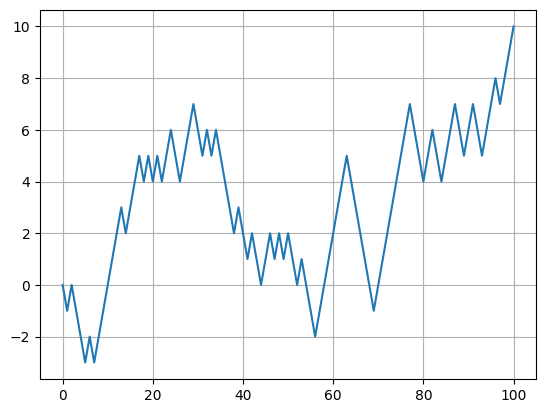

In [ ]:
# Simulacion de una caminata de 100 pasos
caminata=[0]
for i in range(100):
    caminata.append(caminata[-1]+np.random.choice([paso,-paso]))
plt.plot(caminata)
plt.grid()

**Actividad.** Graficar, en una misma ventana de gráficos, al menos ocho caminatas aleatorias de 100 pasos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def caminata(pasos):
  c=[0]
  for i in range(pasos):
    c.append(c[-1]+np.random.choice([1,-1]))
  return c

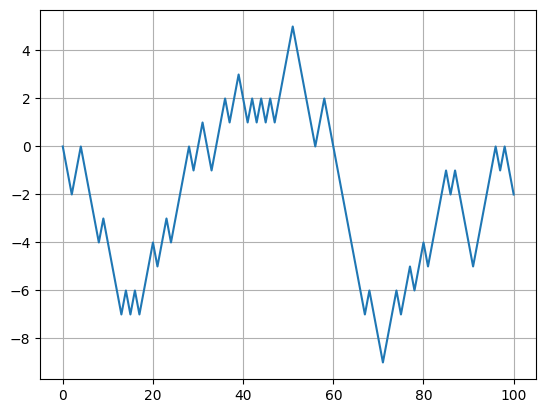

In [ ]:
# Cada que ejecute la función 'caminata' llegaré aposiciones finales diferentes
plt.plot(caminata(100))
plt.grid()

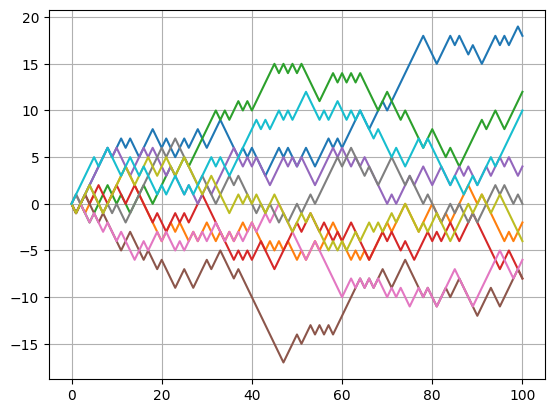

In [ ]:
N=10
for i in range(N):
  plt.plot(caminata(100))
plt.grid()

### Usamos montecarlo para evaluar el resultado de la caminata aleatoria

- Describir, de nuevo, el proceso de la caminata aleatoria en el pizarrón y ver el valor esperado de la caminata después de N pasos.

- Luego, evaluar el proceso utilizando montecarlo y comparar resultados.

In [ ]:
N=1000
caminatas=[]
for i in range(N):
  caminatas.append(caminata(100)[-1])

# ¿Qué estamos buscando?:
# ¿Cuántos escenarios resultaron arriba (valores positivos)?
B=np.array(caminatas)>0 # B=True si la condición satisface los buscado (variable de Bernoulli)
B.mean() # cantidad porcentual de escenarios que resultaron arriba

np.float64(0.469)

In [ ]:
N*B.mean() # Cantidad de escenarios que resultaron arriba

np.float64(469.0)

In [ ]:
# Modificamos el modelo (caminata) para que no almacene toda la trayectoria, sino solo la última posición
def caminata(pasos):
  c=0
  for i in range(pasos):
    c+=np.random.choice([1,-1])
  return c

In [ ]:
N=10000
caminatas=[]
for i in range(N):
  caminatas.append(caminata(100))
B=np.array(caminatas)>0
B.mean()

np.float64(0.4545)

## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

**Explorar función randint de la librería random**

In [ ]:
np.random.randint(1,101)

13

In [ ]:
def ruleta():
  return np.random.randint(1,101)

Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

In [ ]:
# Definimos las reglas del juego
def juego():
  resultado=ruleta()
  return (resultado>50)&(resultado<100),resultado

In [ ]:
juego()

(True, 86)

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, aparecerán cosas muy reveladoras usando un simulador montecarlo.

**Apostador simple.** Las caracterísitcas son:
* Se empieza con un capital inicial,
* Siempre se apuesta lo mismo,
* Y se va a apostar un número determinado de veces.
* Si se gana, se añade la apuesta al capital,
* Si se pierde, se descuenta la apuesta del capital.
* La función debe devolver un arreglo con el capital al final de cada apuesta.

In [ ]:
def apostador(capital_inicial,n_apuestas,apuesta):
  capital=np.zeros(n_apuestas+1)
  capital[0]=capital_inicial
  for i in range(n_apuestas):
    g,r=juego()
    if g:
      capital[i+1]=capital[i]+apuesta
    else:
      capital[i+1]=capital[i]-apuesta
  return capital

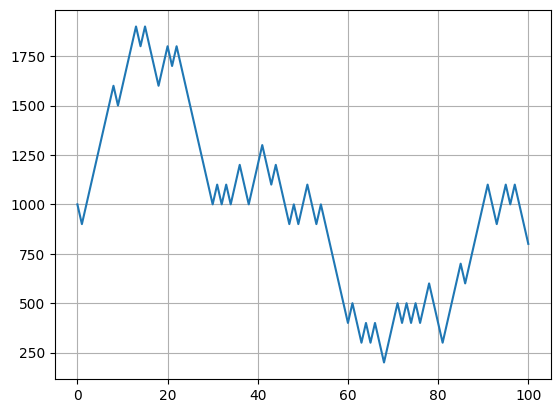

In [ ]:
plt.plot(apostador(1000,100,100))
plt.grid()

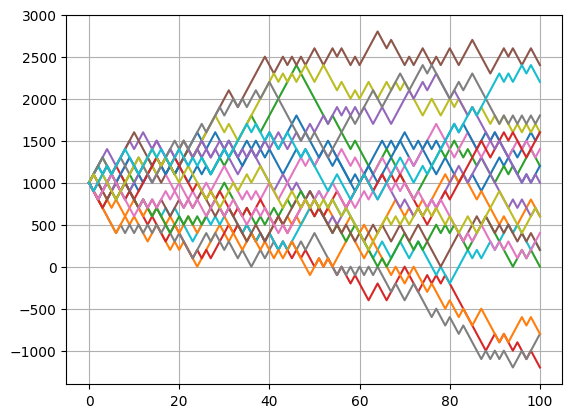

In [ ]:
N=20
for i in range(N):
  plt.plot(apostador(1000,100,100))
plt.grid() # para tener resultado más confiables, debemos aumentar el número de simulaciones

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

In [ ]:
def apostador(capital_inicial,n_apuestas,apuesta):
  capital=capital_inicial
  for i in range(n_apuestas):
    g,r=juego()
    if g:
      capital+=apuesta   # capital = capital + apuesta
    else:
      capital-=apuesta   # capital = capital - apuesta
  return capital

In [ ]:
N=50000
B=0
for i in range(N):
  B+=apostador(1000,100,100)<=0 # Cuántos apostadores llegan a la quiebra
B/N

0.24352

**En cuanto a los apostadores que se quedan en cero**

Podemos ver que, haciendo 50000 simulaciones con el método Montecarlo, el $24\%$ de los apostadores llegan a la quiebra.

---

In [ ]:
N=50000
B=0
for i in range(N):
  B+=apostador(1000,100,100)<=1000 # Cuántos apostadores llegan a la quiebra
B/N

0.6152

**En cuando a los apostadores que resultan en pérdidas**

Haciendo la misma simulación, vemos que el $61.5\%$ de los apostadores terminan con menos capital del que empezaron.

---

Por esto los apostadores pierden. Normalmente las probabilidades no están evidentemente muy en contra de ellos, solo un poco. Los casinos únicamente entienden psicología básica: ganar es extremadamente adictivo. Por ello, los casino se construyen para mantenerte jugando.

En el corto plazo, la mayoría de los jugadores no se dan cuenta que son más propensos a perder. Las veces que ganan y pierden son muy parejas. Estadísticamente, casi la mitad de las personas terminarán con ganancias después de jugar unas pocas veces. El problema es la adicción, y que ellos continuarán apostando, y por ende perdiendo sus ganancias. Es matemática extremadamente básica, pero la psicología humana es débil.

# Simulación de una máquina de estados finitos
Definimos los estados de la máquina:
* $\epsilon_0$: reposo.
* $\epsilon_1$: activo (en espera).
* $\epsilon_2$: proceso 1.
* $\epsilon_3$. proceso 2.

Estando en reposo, el 95% de las interrupciones pasan al estado activo, en el estdo activo, según los históricos, 6 de 10 órdenes mandan la máquina a hacer el proceso 1 y 3 a hacer el proceso 2. En el proceso 1 el 75% de las veces finaliza en la máquina en reposo. En el proceso 2, 5% de las veces es necesario ejecutarlo de nuevo.

Modelar la máquina de estado como una caminata aleatoria y evaluar la probabilidad de que después de 1000 operaciones termine en reposo. Usar el método Montecarlo con 10000 escenarios.

**Modelado**

Le asignamos un valor a cada estado:
\begin{eqnarray}
\epsilon_0&=&0\\
\epsilon_1&=&1\\
\epsilon_2&=&2\\
\epsilon_3&=&3
\end{eqnarray}

Le asignamos una probabilidad y una suma a cada transición:
|estado inicial|estado final|probabilidad|suma (transición)|
|:------------:|:----------:|-----------:|---:|
|$\epsilon_0$|$\epsilon_1$|0.95|+1|
|$\epsilon_0$|$\epsilon_0$|0.05|+0|
|$\epsilon_1$|$\epsilon_1$|0.1|+0|
|$\epsilon_1$|$\epsilon_2$|0.6|+1|
|$\epsilon_1$|$\epsilon_3$|0.3|+2|
|$\epsilon_2$|$\epsilon_0$|0.75|-2|
|$\epsilon_2$|$\epsilon_1$|0.25|-1|
|$\epsilon_3$|$\epsilon_1$|0.95|-2|
|$\epsilon_3$|$\epsilon_3$|0.05|-0|

In [1]:
import numpy as np

In [3]:
def maquina(estado0,operaciones):
  t=[-2,-1,0,1,2]
  # operaciones=1000
  # estado=0
  estado=estado0
  for i in range(operaciones):
    if estado==0:
      p=[0,0,0.05,0.95,0] # Las probabilidades deben tener el mismo tamaño que las transiciones y sus elementos deben sumar 1
    elif estado==1:
      p=[0,0,0.1,0.6,0.3]
    elif estado==2:
      p=[0.75,0.25,0,0,0]
    else:
      p=[0.95,0,0.05,0,0]
    estado+=np.random.choice(t,p=p)
  return estado

np.int64(1)

In [5]:
maquina(0,1000)

np.int64(0)

In [4]:
# Evaluamos cuántos escenarios quedan en reposo en 10000 simulaciones
B=0
for i in range(10000):
  B+=maquina(0,1000)==0 # Buscamos cuántos escenarios terminan en el estado de reposo
B/10000

np.float64(0.2031)

**Resultado:**

La probabilidad de terminar en reposo despues de 1000 operaciones es de $20.3\%$ usando el método Montecarlo con 10000 simulaciones.